In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

--- 

## Helping Routines

In [1444]:
def show(img, figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def cv2show(img):
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

---

In [1233]:
tt = np.uint8([[[200, 112, 46]]])

In [1234]:
cv2.cvtColor(tt, cv2.COLOR_RGB2HSV)

array([[[ 13, 196, 200]]], dtype=uint8)

## Loading the data

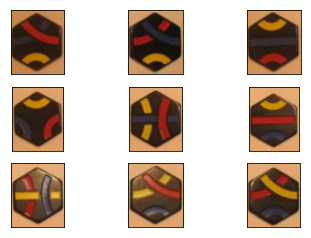

In [1423]:
def plot_samples_in_grid(path, num):
    f, axarr = plt.subplots(num, num)
    for k, img_name in enumerate(os.listdir(path)[:num**2]):
        img = cv2.imread(path+img_name, cv2.IMREAD_COLOR)
        axarr[k//num, k%num].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
        axarr[k//num, k%num].set_xticks([])
        axarr[k//num, k%num].set_yticks([])
    plt.show()

plot_samples_in_grid("data/train/", 3)

In [1425]:
def decompose_by_channels(path):
    data = {"H": np.uint8([]), "S": np.uint8([]), "V": np.uint8([])}
    for img_name in os.listdir(path):
        #print(img_name)
        im = cv2.imread(path+img_name, cv2.IMREAD_COLOR)
        for name, channel in zip(["H", "S", "V"], cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))):
            data[name] = np.append(data[name], channel.reshape(channel.shape[0]*channel.shape[1]))
    return data

Load sample coins

In [1072]:
coins = []
for i in range(1, 11):
    coins.append(cv2.imread("data/train/%d.png"%i, cv2.IMREAD_COLOR))

Load non-coins

In [1073]:
non_coins = []
for i in range(1, 10):
    non_coins.append(cv2.imread("data/non-coins/non_%d.png"%i, cv2.IMREAD_COLOR))

Load color samples

In [1424]:
R_hsv = decompose_by_channels("data/R/")

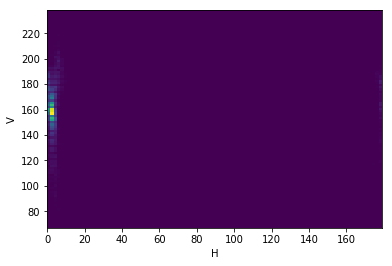

In [1438]:
plt.hist2d(R_hsv["H"], R_hsv["V"], bins=100)
plt.xlabel("H")
plt.ylabel("V")
plt.show()

In [ ]:
R = decompose_by_channels("data/R/")
Y = decompose_by_channels("data/Y/")
B = decompose_by_channels("data/B/")
Bg = decompose_by_channels("data/bg/")
D = decompose_by_channels("data/D/")

## Color Analysis

### Red

In [ ]:
plt.hist2d(R["H"], R["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("red")
plt.show()
plt.hist2d(R["S"], R["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("red")
plt.show()

### Yellow

In [ ]:
plt.hist2d(Y["H"], Y["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("yellow")
plt.show()
plt.hist2d(Y["S"], Y["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("yellow")
plt.show()

### Blue

In [ ]:
plt.hist2d(B["H"], B["S"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("H")
plt.ylabel("S")
plt.title("blue")
plt.show()
plt.hist2d(B["S"], B["V"], bins=100, range=[[0, 255], [0, 255]])
plt.xlabel("S")
plt.ylabel("V")
plt.title("blue")
plt.show()

Basing on the abovelisted histograms, we can estimate limits for all colors in HSV space

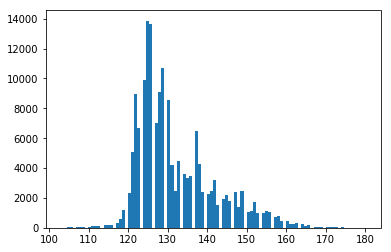

In [1157]:
plt.hist(Bg["S"], bins=100)
plt.show()

In [1235]:
low_yellow = np.array([13, 140, 150]) #ok!
high_yellow = np.array([ 25, 255, 255]) #ok!
low_red = np.array([0, 110, 110]) #ok 
high_red = np.array([10, 255, 255]) #ok
low_blue = np.array([100, 0, 25]) #ok 
high_blue = np.array([180, 100, 175]) #ok
low_blue_2 = np.array([0, 0, 25]) #ok
high_blue_2 = np.array([25, 100, 175]) #ok
low_bg = np.array([12, 110, 180])#np.array([40, 100, 170])
high_bg = np.array([16, 200, 255])#np.array([255, 255, 255])
low_dark = np.array([0, 50, 0])
high_dark = np.array([25, 200, 150])

---

BACKUP

In [1199]:
low_yellow = np.array([13, 140, 150]) #ok!
high_yellow = np.array([ 25, 255, 255]) #ok!
low_red = np.array([0, 110, 75]) #ok 
high_red = np.array([12, 255, 240]) #ok
low_blue = np.array([100, 0, 25]) #ok 
high_blue = np.array([180, 100, 175]) #ok
low_blue_2 = np.array([0, 0, 25]) #ok
high_blue_2 = np.array([25, 100, 175]) #ok
low_bg = np.array([12, 100, 180])#np.array([40, 100, 170])
high_bg = np.array([16, 170, 240])#np.array([255, 255, 255])
low_dark = np.array([0, 50, 0])
high_dark = np.array([25, 200, 150])

Here is the code for testing color extraction from sample coins:

In [ ]:
for coin in coins:
    coin_hsv = cv2.cvtColor(coin, cv2.COLOR_BGR2HSV)
    mask = cv2.bitwise_or(cv2.inRange(coin_hsv, low_blue, high_blue),
                                        cv2.inRange(coin_hsv, low_blue_2, high_blue_2))
    pattern_hsv = cv2.bitwise_and(coin_hsv, coin_hsv, mask=mask)
    pattern = cv2.cvtColor(pattern_hsv, cv2.COLOR_HSV2BGR)
    median = cv2.medianBlur(pattern,15)
    show(median)

---

## Segmentation

In [ ]:
def get_segments_markers(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img, low_bg, high_bg)
    res = cv2.bitwise_and(img, img, mask=mask)
    gray = cv2.cvtColor(cv2.cvtColor(res,cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((10,10),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    sure_fg = cv2.dilate(opening,kernel,iterations=1)
    sure_bg = cv2.bitwise_not(cv2.dilate(opening,kernel, iterations=15))
    unknown = cv2.bitwise_and(cv2.bitwise_not(sure_bg), cv2.bitwise_not(sure_fg))
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    return cv2.watershed(img,markers)

---

## Feature Extraction 

In [1297]:
def extract_objects_from_segment(img_segment):
    img_segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2HSV)
    mask = cv2.bitwise_not(cv2.inRange(img_segment, low_bg, high_bg))
    segment_wo_bg = cv2.bitwise_and(img_segment, img_segment, mask=mask)
    segment_wo_bg = cv2.cvtColor(segment_wo_bg, cv2.COLOR_HSV2BGR)
    median = cv2.medianBlur(segment_wo_bg, 7)
    gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    fragments = []
    for contour in contours:
        cntr_x = contour.T[0][0]
        cntr_y = contour.T[1][0]
        center_y = int((min(cntr_y) + max(cntr_y))/2)
        center_x = int((min(cntr_x)+max(cntr_x))/2)
        fragment = median[min(cntr_y):max(cntr_y),min(cntr_x):max(cntr_x), :]
        if fragment.shape[0] == 0 or fragment.shape[1] == 0:
            continue
        fragments.append(((center_x, center_y), cv2.resize(fragment, (100, 100))))
    return fragments

In [1286]:
def extract_colour_features(img):
    fragment_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    red_mask = cv2.inRange(fragment_hsv, low_red, high_red)
    red_fragment = cv2.bitwise_and(fragment_hsv, fragment_hsv, red_mask)
    yellow_mask = cv2.inRange(fragment_hsv, low_red, high_red)
    yellow_fragment = cv2.bitwise_and(fragment_hsv, fragment_hsv, yellow_mask)
    blue_mask = cv2.bitwise_or(cv2.inRange(fragment_hsv, low_blue, high_blue),
                                        cv2.inRange(fragment_hsv, low_blue_2, high_blue_2))
    blue_fragment = cv2.bitwise_and(fragment_hsv, fragment_hsv, blue_mask)
    red_fragment_smooth = cv2.cvtColor(cv2.medianBlur(cv2.cvtColor(red_fragment, cv2.COLOR_HSV2BGR), 7), cv2.COLOR_BGR2HSV)
    blue_fragment_smooth = cv2.cvtColor(cv2.medianBlur(cv2.cvtColor(blue_fragment, cv2.COLOR_HSV2BGR), 7), cv2.COLOR_BGR2HSV)
    yellow_fragment_smooth = cv2.cvtColor(cv2.medianBlur(cv2.cvtColor(yellow_fragment, cv2.COLOR_HSV2BGR), 7), cv2.COLOR_BGR2HSV)
    red_pixels = sum(sum(cv2.inRange(red_fragment_smooth, low_red, high_red) == 255))
    yellow_pixels = sum(sum(cv2.inRange(yellow_fragment_smooth, low_yellow, high_yellow) == 255))
    blue_pixels = sum(sum(cv2.bitwise_or(cv2.inRange(blue_fragment_smooth, low_blue, high_blue),
                                        cv2.inRange(blue_fragment_smooth, low_blue_2, high_blue_2)) == 255))
    all_coloured_pixels = red_pixels + yellow_pixels + blue_pixels
    if all_coloured_pixels == 0:
        all_coloured_pixels = 1
    return np.array([red_pixels/all_coloured_pixels, 
                yellow_pixels/all_coloured_pixels, 
                blue_pixels/all_coloured_pixels, all_coloured_pixels/(100*100)])

In [1229]:
def get_contours_count(img, color_mask):
    obj_hsv = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
    line = cv2.cvtColor(cv2.bitwise_and(obj_hsv, obj_hsv, mask=color_mask), cv2.COLOR_HSV2BGR)
    line_median = cv2.medianBlur(line, 15)
    gray = cv2.cvtColor(line_median, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

---

## Generate dataset for coins detection

In [1254]:
X = []
objs = []
coins_ctr = 0
for img in coins:
    markers = get_segments_markers(img)
    segments_num = markers.max()
    for j in range(segment_num+1):
        img_segment = img.copy()
        img_segment[markers != j] = [0, 0, 0]
        for obj in extract_objects_from_segment(img_segment):
            objs.append(obj)
            features = np.array([])
            features = np.append(features, extract_colour_features(obj))
            obj_hsv = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
            red_mask = cv2.inRange(obj_hsv, low_red, high_red)
            yellow_mask = cv2.inRange(obj_hsv, low_yellow, high_yellow)
            blue_mask = cv2.bitwise_or(cv2.inRange(obj_hsv, low_blue, high_blue),
                                     cv2.inRange(obj_hsv, low_blue_2, high_blue_2))
            features = np.append(features, 2/(get_contours_count(obj, red_mask) + 1))
            features = np.append(features, 2/(get_contours_count(obj, yellow_mask) + 1))
            features = np.append(features, 2/(get_contours_count(obj, blue_mask) + 1))
            X.append(features)
            
            coins_ctr +=1 
X = X[1:]
objs = objs[1:]
coins_ctr -= 1
            
non_coins_ctr = 0
for img in non_coins:
    markers = get_segments_markers(img)
    segments_num = markers.max()
    for j in range(segment_num+1):
        img_segment = img.copy()
        img_segment[markers != j] = [0, 0, 0]
        for obj in extract_objects_from_segment(img_segment):
            objs.append(obj)
            features = np.array([])
            features = np.append(features, extract_colour_features(obj))
            obj_hsv = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
            red_mask = cv2.inRange(obj_hsv, low_red, high_red)
            yellow_mask = cv2.inRange(obj_hsv, low_yellow, high_yellow)
            blue_mask = cv2.bitwise_or(cv2.inRange(obj_hsv, low_blue, high_blue),
                                     cv2.inRange(obj_hsv, low_blue_2, high_blue_2))
            features = np.append(features, 2/(get_contours_count(obj, red_mask)+1))
            features = np.append(features, 2/(get_contours_count(obj, yellow_mask)+1))
            features = np.append(features, 2/(get_contours_count(obj, blue_mask) + 1))
            non_coins_ctr += 1
            X.append(features)
            
Y = np.array([1]*coins_ctr + [0]*non_coins_ctr)

In [ ]:
for k, (obj, y, features) in enumerate(zip(objs, Y, X)):
    show(obj)
    print(k+1, features)

---

## Learn to recognize coins

In [1258]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [1259]:
alg1 = LogisticRegression()
alg2 = RandomForestClassifier()

In [1260]:
np.mean(cross_val_score(alg1, X, Y))

0.77508417508417515

In [1261]:
np.mean(cross_val_score(alg2, X, Y))

0.96296296296296291

In [1262]:
alg2.fit(X, Y)
is_it_coin = alg2

---

## Generate testing datasets

In [1290]:
def generate_features(img):
    X = []
    objs = []
    coords = []
    markers = get_segments_markers(img)
    segments_num = markers.max()
    for j in range(segments_num+1):
        img_segment = img.copy()
        img_segment[markers != j] = [0, 0, 0]
        for coord, obj in extract_objects_from_segment(img_segment):
            features = np.array([])
            color_features = extract_colour_features(obj)
            features = np.append(features, color_features)
            obj_hsv = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
            red_mask = cv2.inRange(obj_hsv, low_red, high_red)
            yellow_mask = cv2.inRange(obj_hsv, low_yellow, high_yellow)
            blue_mask = cv2.bitwise_or(cv2.inRange(obj_hsv, low_blue, high_blue),
                                     cv2.inRange(obj_hsv, low_blue_2, high_blue_2))
            features = np.append(features, 2/(1+get_contours_count(obj, red_mask)))
            features = np.append(features, 2/(1+get_contours_count(obj, yellow_mask)))
            features = np.append(features, 2/(1+get_contours_count(obj, blue_mask)))
            if is_it_coin.predict(features.reshape(1, -1)):
                objs.append(obj)
                X.append(features)
                coords.append(coord)
    return X, objs, coords

In [1298]:
img = cv2.imread("data/samples/Group_4.bmp", cv2.IMREAD_COLOR)
X_test, objs_test, coords_test = generate_features(img)

In [1440]:
markers = get_segments_markers(img)

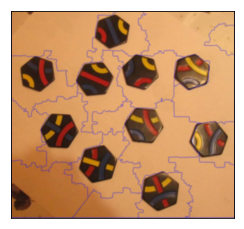

In [1441]:
img[markers == -1] = [255, 0, 0]

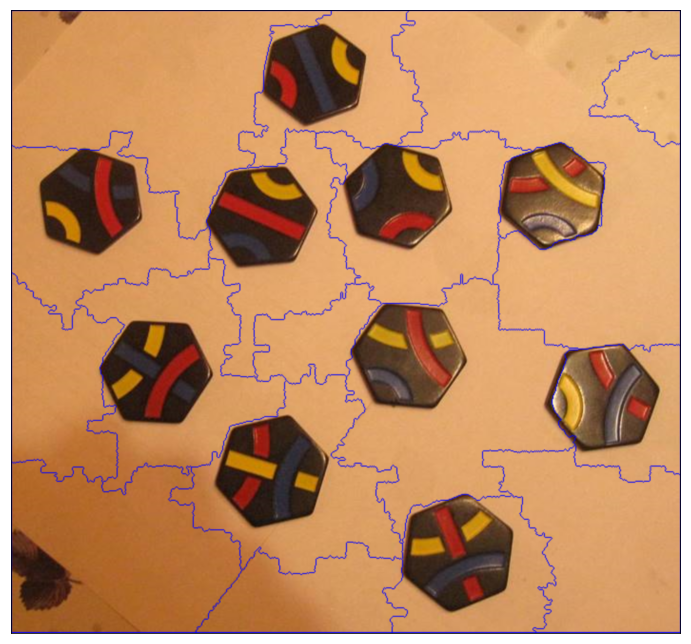

In [1445]:
show(img, figsize=(12, 12))

In [1299]:
for obj, x, coord in zip(objs_test, X_test, coords_test):
    closest = np.argmin([np.linalg.norm(x - y) for y in X[:10]])+1
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'%d'%closest,coord, font, 1,(255,255,255),2,cv2.LINE_AA)

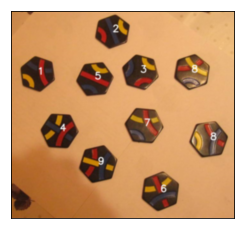

In [1300]:
show(img)

---

## Interface

* подсчет фишек
* тип дуг на фишке
* номер фишки
* аннтоация фишек

In [1402]:
class AnnotatedCoin:
    
    edges = {
        1: "Длинная красная дуга малой кривизны, длинная синяя дуга малой кривизны, короткая желтая дуга большой кривизны",
        2: "Короткая красная дуга большой кривизны, прямолинейный синий сегмент, короткая желтая дуга большой кривизны",
        3: "Короткая красная дуга большой кривизны, короткая синяя дуга большой кривизны, короткая желтая дуга большой кривизны",
        4: "Длинная красная дуга малой кривизны, длинная желтая дуга малой кривизны, прямолинейный синий сегмент",
        5: "Короткая желтая дуга малой кривизны, прямолинейный красный сегмент, короткая синяя дуга малой кривизны",
        6: "Длинная красная дуга малой кривизны, длинная синяя дуга малой кривизны, прямолинейный желтый сегмент",
        7: "Длинная красная дуга малой кривизны, длинная желтая дуга малой кривизны,  короткая синяя дуга большой кривизны",
        8: "Длинная красная дуга малой кривизны, длинная желтая дуга малой кривизны, короткая синяя дуга большой кривизны",
        9: "Прямолинейный красный сегмент, длинная желтая дуга малой кривизны, длинная синяя дуга малой кривизны",
        10: "Длинная красная дуга малой кривизны, длинная синяя дуга малой кривизны, короткая желтая дуга большой кривизны"
        
    }
    
    def __init__(self, img, train_samples):
        self.__img = img
        X, objs, coords = generate_features(img)
        self.__X = X
        self.__objs = objs
        self.__coords = coords
        self.__ts = train_samples

    def count_coins(self):
        return len(self.__X)

    def get_image(self):
        result = img.copy()
        for obj, x, coord in zip(self.__objs, self.__X, self.__coords):
            closest = np.argmin([np.linalg.norm(x - y) for y in self.__ts[:10]])+1
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(result,'%d'%closest,coord, font, 1,(255,255,255),2,cv2.LINE_AA)
        return result
    
    def get_coin_type(self):
        if len(self.__X) > 1:
            raise Exception("There are more than one coin on this picture :(")
        x = self.__X[0]
        return np.argmin([np.linalg.norm(x - y) for y in self.__ts[:10]])+1
    
    def get_edges(self):
        k = self.get_coin_type()
        return self.edges[k] 

In [1456]:
img = cv2.imread("data/samples/Group_4.bmp", cv2.IMREAD_COLOR)

In [1457]:
annotated = AnnotatedCoin(img, X)

In [1458]:
print("%d coins"%annotated.count_coins())

10 coins


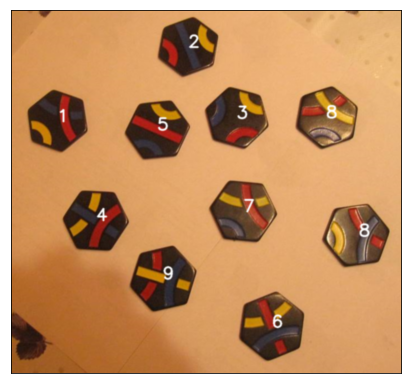

In [1459]:
show(annotated.get_image(), figsize=(7, 7))

In [1401]:
annotated.get_edges()

Exception: There is more than one coin on this picture :(

## Different testing code

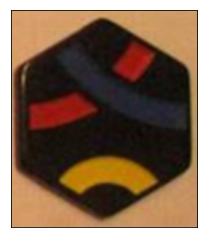

In [1001]:
sample = coins[9]
show(sample)

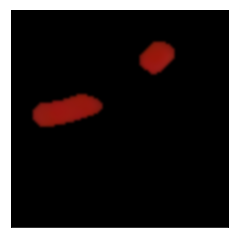

2


In [999]:
markers = get_segments_markers(sample)
segments_num = markers.max()
for j in range(segment_num+1):
    img_segment = sample.copy()
    img_segment[markers != j] = [0, 0, 0]
    for obj in extract_objects_from_segment(img_segment):
        obj_hsv = cv2.cvtColor(obj, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(obj_hsv, low_red, high_red)
        red_line = cv2.cvtColor(cv2.bitwise_and(obj_hsv, obj_hsv, mask=mask), cv2.COLOR_HSV2BGR)
        red_line_median = cv2.medianBlur(red_line, 7)
        show(red_line_median)
        gray = cv2.cvtColor(red_line_median, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
        image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        print(len(contours))
        #obj2 = cv2.drawContours(obj, contours, -1, (0,255,0), 3)
        #show(obj2)

---

In [ ]:
img_segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2HSV)
mask = cv2.bitwise_not(cv2.inRange(img_segment, low_bg, high_bg))
segment_wo_bg = cv2.bitwise_and(img_segment, img_segment, mask=mask)
segment_wo_bg = cv2.cvtColor(segment_wo_bg, cv2.COLOR_HSV2BGR)
show(segment_wo_bg)

In [ ]:
median = cv2.medianBlur(segment_wo_bg, 7)
show(median)

In [ ]:
gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)

In [ ]:
cv2show(thresh)

In [ ]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
median_with_contour = cv2.drawContours(median, contours, -1, (0,255,0), 3)

In [ ]:
show(median_with_contour)

In [ ]:
fragments = []
for contour in contours:
    cntr_x = contour.T[0][0]
    cntr_y = contour.T[1][0]
    print(min(cntr_x),max(cntr_x),min(cntr_y),max(cntr_y))
    fragment = median[min(cntr_y):max(cntr_y),min(cntr_x):max(cntr_x), :]
    fragments.append(cv2.resize(fragment, (100, 100)))

In [ ]:
show(fragments[0])

In [ ]:
fragment = cv2.cvtColor(fragments[2], cv2.COLOR_BGR2HSV)
mask = cv2.inRange(fragment, low_red, high_red)
pattern = cv2.bitwise_and(fragment, fragment, mask=mask)
show(cv2.cvtColor(pattern, cv2.COLOR_HSV2BGR))

In [ ]:
fragment_hsv = cv2.cvtColor(fragments[0], cv2.COLOR_BGR2HSV)
red_pixels = sum(sum(cv2.inRange(fragment_hsv, low_red, high_red) == 255))
yellow_pixels = sum(sum(cv2.inRange(fragment_hsv, low_yellow, high_yellow) == 255))
blue_pixels = sum(sum(cv2.bitwise_or(cv2.inRange(fragment_hsv, low_blue, high_blue),
                                    cv2.inRange(fragment_hsv, low_blue_2, high_blue_2)) == 255))
all_coloured_pixels = red_pixels + yellow_pixels + blue_pixels
if all_coloured_pixels == 0:
    all_coloured_pixels = 1
print([red_pixels/all_coloured_pixels, 
            yellow_pixels/all_coloured_pixels, 
            blue_pixels/all_coloured_pixels])

___

In [ ]:
def generate_color_features(img_segment):
    #img_segment = cv2.cvtColor(img_segment, cv2.COLOR_BGR2HSV)
    mask = cv2.bitwise_not(cv2.inRange(img_segment, low_bg, high_bg))
    segment_wo_bg = cv2.bitwise_and(img_segment, img_segment, mask=mask)
    mask = cv2.bitwise_not(cv2.inRange(segment_wo_bg, low_dark, high_dark))
    maybe_fishka = cv2.bitwise_and(segment_wo_bg, segment_wo_bg, mask=mask)
    red_pixels = sum(sum(cv2.inRange(maybe_fishka, low_red, high_red) == 255))
    yellow_pixels = sum(sum(cv2.inRange(maybe_fishka, low_yellow, high_yellow) == 255))
    blue_pixels = sum(sum(cv2.bitwise_or(cv2.inRange(maybe_fishka, low_blue, high_blue),
                                    cv2.inRange(maybe_fishka, low_blue_2, high_blue_2)) == 255))
    all_coloured_pixels = red_pixels + yellow_pixels + blue_pixels
    return [red_pixels/all_coloured_pixels, 
            yellow_pixels/all_coloured_pixels, 
            blue_pixels/all_coloured_pixels]

In [ ]:
#img_segment = img.copy()
#img_segment[markers != 4] = [0, 0, 0]
#show(img_segment)
generate_color_features(img_segment)

## segmentation (поставить перед feature selection)

Заставить исчезнуть полоски

In [ ]:
img = cv2.imread("data/samples/Group_4.bmp", cv2.IMREAD_COLOR)
mask = cv2.inRange(img, low_bg, high_bg)
res = cv2.bitwise_and(img, img, mask=mask)
show(res)

In [ ]:
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
sure_fg = cv2.dilate(opening,kernel,iterations=1)
sure_bg = cv2.bitwise_not(cv2.dilate(opening,kernel, iterations=15))
unknown = cv2.bitwise_and(cv2.bitwise_not(sure_bg), cv2.bitwise_not(sure_fg))

In [ ]:
cv2show(sure_bg)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

In [ ]:
markers = markers+1

In [ ]:
markers[unknown==255] = 0

In [ ]:
markers = cv2.watershed(img,markers)


In [ ]:
img[markers == -1] = [255,0,0]

In [ ]:
show(img)